<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 6 - OPTIMIZATION

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Agenda

1. Practice MLP using Tensorflow 2

# 1. Load data

**DATASET** https://drive.google.com/file/d/10qji60k1nz0JCoXyWDq749c4t3qfYlF9/view?usp=sharing

In [ ]:
!unzip -qq '/content/drive/My Drive/Colab Notebooks/fingerprint.zip' -d ''

replace SOCOFing/Altered/Altered-Easy/100__M_Left_index_finger_CR.BMP? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import numpy as np
import os
import cv2

def extract_label(img_path,train = True):
  filename, _ = os.path.splitext(os.path.basename(img_path))

  subject_id, etc = filename.split('__')
  
  if train:
      gender, lr, finger, _, _ = etc.split('_')
  else:
      gender, lr, finger, _ = etc.split('_')
  
  gender = 0 if gender == 'M' else 1
  lr = 0 if lr == 'Left' else 1

  if finger == 'thumb':
      finger = 0
  elif finger == 'index':
      finger = 1
  elif finger == 'middle':
      finger = 2
  elif finger == 'ring':
      finger = 3
  elif finger == 'little':
      finger = 4
  return np.array([gender], dtype=np.uint16)

img_size = 96

def loading_data(path,train):

  print("loading data from: ",path)
  data = []
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      img_resize = cv2.resize(img_array, (img_size, img_size))
      label = extract_label(os.path.join(path, img),train)
      data.append([label[0], img_resize ])
    except Exception as e:
      pass
  return data

Real_path = "/content/SOCOFing/Real"
Easy_path = "/content/SOCOFing/Altered/Altered-Easy"
Medium_path = "/content/SOCOFing/Altered/Altered-Medium"
Hard_path = "/content/SOCOFing/Altered/Altered-Hard"

Easy_data = loading_data(Easy_path, train = True)
Medium_data = loading_data(Medium_path, train = True)
Hard_data = loading_data(Hard_path, train = True)
test = loading_data(Real_path, train = False)

data = np.concatenate([Easy_data, Medium_data, Hard_data], axis=0)

del Easy_data, Medium_data, Hard_data

import random
random.shuffle(data)
random.shuffle(test)

X_train, y_train = [], []
for label, feature in data:
    y_train.append(label)
    X_train.append(feature)
X_train = np.array(X_train).reshape(-1, img_size, img_size, 1)
X_train = X_train / 255.0

X_test, y_test = [], []

for label, feature in test:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0

del test
del data

y_train = np.array(y_train)
y_test = np.array(y_test)

loading data from:  /content/SOCOFing/Altered/Altered-Easy
loading data from:  /content/SOCOFing/Altered/Altered-Medium
loading data from:  /content/SOCOFing/Altered/Altered-Hard
loading data from:  /content/SOCOFing/Real


In [ ]:
# TODOs:
# 1. Print out the shape of Train Set and Test Set
print('Shape of X train',X_train.shape)
print('Shape of y train',y_train.shape)
print('Shape of X test',X_test.shape)
print('Shape of y test',y_test.shape)
print(np.unique(y_train))

Shape of X train (49270, 96, 96, 1)
Shape of y train (49270,)
Shape of X test (6000, 96, 96, 1)
Shape of y test (6000,)
[0 1]


# 2. Visualize data

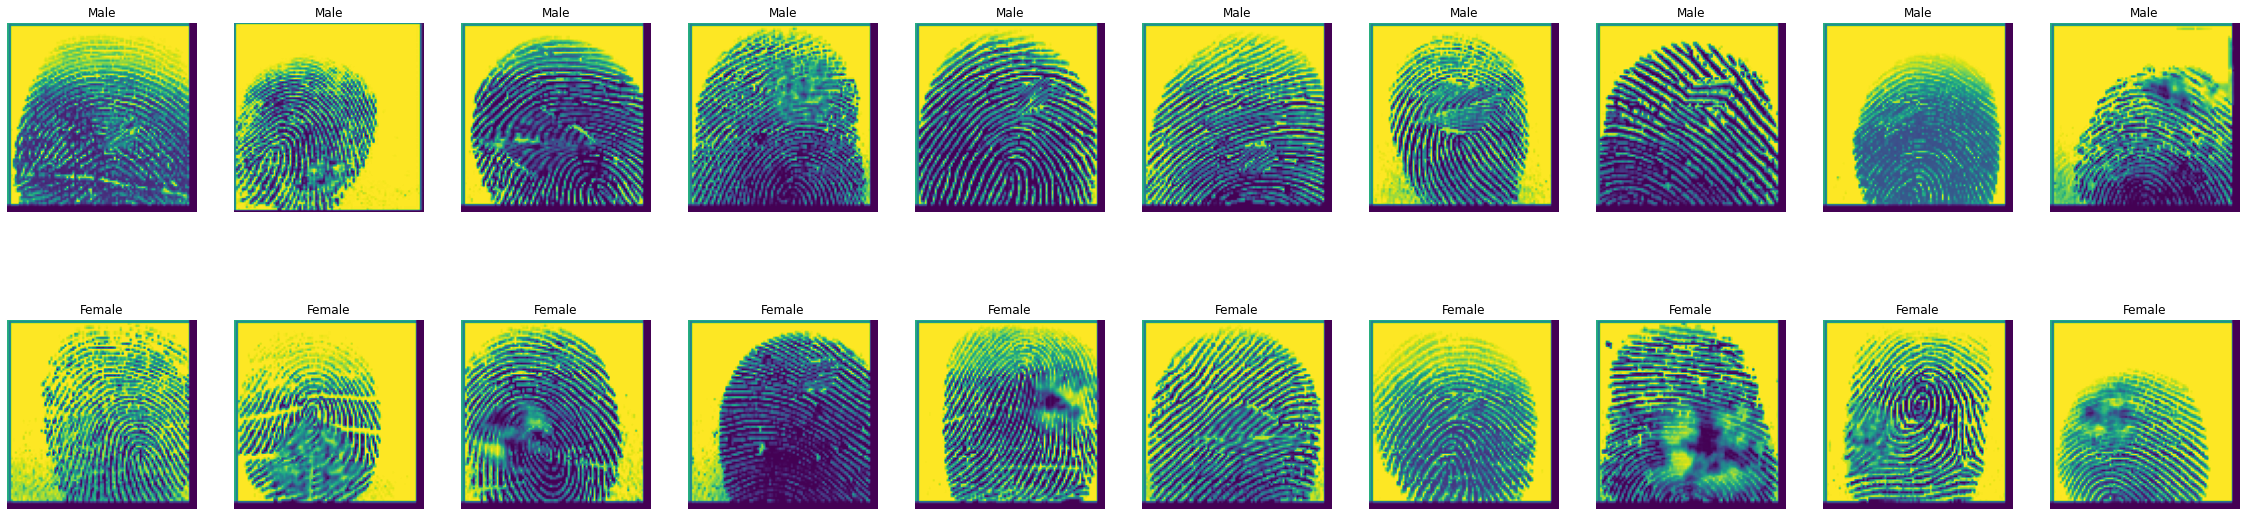

In [ ]:
np.random.seed(42)

# TODOs:
# 1. Visualize 10 images belong to Male and 10 images belong to Female
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(2,10)
fig.set_figheight(10)
fig.set_figwidth(40)
for i in range(2):
    for j in range(10):
        target = np.random.choice(np.where(y_train == i )[0])
        axes[i][j].axis('off')
        axes[i][j].grid('off')
        axes[i][j].imshow(np.squeeze(X_train[target]))
        axes[0][j].set_title('Male')
        axes[1][j].set_title('Female')


# 3. Training model

In [ ]:

from tensorflow.random import set_seed
set_seed(42)

# TODO
# 1. Build a Deep Neural Network to solve the fingerprint problem
# 2. Train on 10 Epochs and print out the accuracy on Test Set
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import plot_model
adam_model = Sequential()
# Conv2D(output,input,kernel,activation,padding)
adam_model.add(Flatten(input_shape = (X_train.shape[1:])))
adam_model.add(Dense(100,activation = 'relu'))
adam_model.add(Dense(100,activation = 'relu'))
adam_model.add(Dense(100,activation = 'relu'))
adam_model.add(Dense(1,activation = 'sigmoid'))
adam_model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = 'accuracy')

adam_history = adam_model.fit(X_train,y_train,epochs = 10)
# adam_model.summary()
# plot_model(model,'model.png')

Epoch 1/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4889 - accuracy: 0.7919
Epoch 2/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4300 - accuracy: 0.8122
Epoch 3/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.3475 - accuracy: 0.8536
Epoch 4/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.2803 - accuracy: 0.8876
Epoch 5/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.2455 - accuracy: 0.9039
Epoch 6/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.2248 - accuracy: 0.9149
Epoch 7/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.2042 - accuracy: 0.9236
Epoch 8/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.1935 - accuracy: 0.9267
Epoch 9/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.1748 - accuracy: 0.9351
Epoch 10/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.169

In [ ]:
adam_model.evaluate(X_test,y_test)

188/188 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9512


[0.15816180408000946, 0.9511666893959045]

In [ ]:
sgd_model = Sequential()
sgd_model.add(Flatten(input_shape = (X_train.shape[1:])))
sgd_model.add(Dense(100,activation = 'relu'))
sgd_model.add(Dense(100,activation = 'relu'))
sgd_model.add(Dense(100,activation = 'relu'))
sgd_model.add(Dense(1,activation = 'sigmoid'))
sgd_model.compile(loss = 'binary_crossentropy',optimizer = 'sgd', metrics = 'accuracy')
sgd_history = sgd_model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4858 - accuracy: 0.7934
Epoch 2/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4586 - accuracy: 0.7981
Epoch 3/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4363 - accuracy: 0.8024
Epoch 4/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.4077 - accuracy: 0.8149
Epoch 5/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.3746 - accuracy: 0.8310
Epoch 6/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.3478 - accuracy: 0.8442
Epoch 7/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.3191 - accuracy: 0.8586
Epoch 8/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.2897 - accuracy: 0.8764
Epoch 9/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.2675 - accuracy: 0.8862
Epoch 10/10
1540/1540 [==============================] - 4s 3ms/step - loss: 0.258

In [ ]:
sgd_model.evaluate(X_test,y_test)

188/188 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8312


[0.35939115285873413, 0.831166684627533]

In [ ]:
rms_model = Sequential()
rms_model.add(Flatten(input_shape = (X_train.shape[1:])))
rms_model.add(Dense(100,activation = 'relu'))
rms_model.add(Dense(100,activation = 'relu'))
rms_model.add(Dense(100,activation = 'relu'))
rms_model.add(Dense(1,activation = 'sigmoid'))
rms_model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics = 'accuracy')
rms_history = rms_model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.5086 - accuracy: 0.7881
Epoch 2/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.4512 - accuracy: 0.8000
Epoch 3/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.4201 - accuracy: 0.8148
Epoch 4/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.3971 - accuracy: 0.8274
Epoch 5/10
1540/1540 [==============================] - 5s 4ms/step - loss: 0.3791 - accuracy: 0.8378
Epoch 6/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.3649 - accuracy: 0.8445
Epoch 7/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.3505 - accuracy: 0.8516
Epoch 8/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.3419 - accuracy: 0.8565
Epoch 9/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.3315 - accuracy: 0.8616
Epoch 10/10
1540/1540 [==============================] - 5s 3ms/step - loss: 0.319

In [ ]:
rms_model.evaluate(X_test,y_test)

188/188 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9052


[0.26116952300071716, 0.9051666855812073]

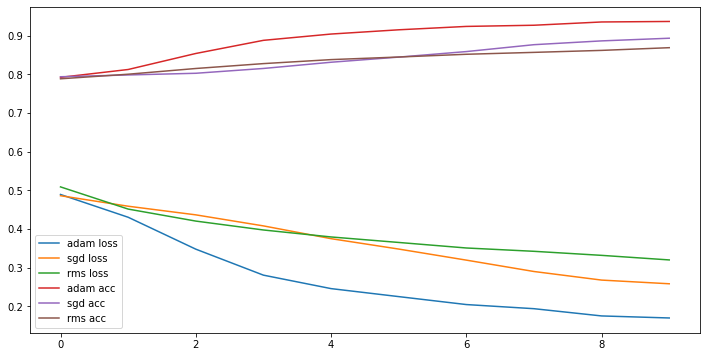

In [ ]:
# TODO
# 1. Plot the learning curve (loss vs. epochs and loss vs)

plt.figure(figsize = (12,6))
# plt.subplot(1,2,1)
plt.plot(adam_history.history['loss'])
plt.plot(sgd_history.history['loss'])
plt.plot(rms_history.history['loss'])
# plt.title('Loss vs Epochs')
# plt.subplot(1,2,2)
plt.plot(adam_history.history['accuracy'])
plt.plot(sgd_history.history['accuracy'])
plt.plot(rms_history.history['accuracy'])
plt.legend(['adam loss','sgd loss','rms loss','adam acc','sgd acc','rms acc'])
plt.show()

In [ ]:
y_predict = adam_model.predict(X_test)
print(y_predict)

[[0.04322143]
 [0.18524896]
 [0.02851936]
 ...
 [0.93073857]
 [0.94150996]
 [0.030456  ]]


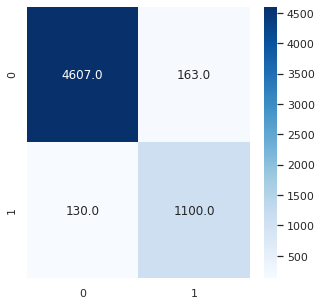

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
y_pred = adam_model.predict(X_test)
y_pred = np.where(y_pred >0.5,1,0) #Chuyen tu gia tri xac suat sang gia tri khac qua threshold 
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,cmap = 'Blues',fmt = '.1f') # Bieu do nhiet so cang lon thi mau cang dam
# Dung de xem du lieu co balance ko 

In [ ]:
from sklearn.metrics import accuracy_score

threshold_list = np.arange(0.3,0.9,0.05)
for thresh in threshold_list :
    y_pred = adam_model.predict(X_test)
    y_pred = np.where(y_pred > thresh,1,0)
    print('threshold ={}, accuracy = {:.5f} '.format(thresh,accuracy_score(y_test,y_pred)))

threshold =0.3, accuracy = 0.92650 
threshold =0.35, accuracy = 0.93633 
threshold =0.39999999999999997, accuracy = 0.94350 
threshold =0.44999999999999996, accuracy = 0.94850 
threshold =0.49999999999999994, accuracy = 0.95117 
threshold =0.5499999999999999, accuracy = 0.95367 
threshold =0.5999999999999999, accuracy = 0.95517 
threshold =0.6499999999999999, accuracy = 0.95483 
threshold =0.7, accuracy = 0.95317 
threshold =0.7499999999999999, accuracy = 0.94933 
threshold =0.7999999999999998, accuracy = 0.94600 
threshold =0.8499999999999999, accuracy = 0.93733 
threshold =0.8999999999999999, accuracy = 0.91267 
